<a href="https://colab.research.google.com/github/sameersahu473/Time_series/blob/main/datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import numpy as np
import pandas as pd

In [112]:
dt = pd.read_csv('/content/drive/My Drive/kaggle/AirQuality.csv',delimiter=';')

In [113]:
dt.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [114]:
cols = ['Date','Time','CO(GT)','T']
data = dt[cols]

In [115]:
data.head()

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,"2,6","13,6"
1,10/03/2004,19.00.00,2,"13,3"
2,10/03/2004,20.00.00,"2,2","11,9"
3,10/03/2004,21.00.00,"2,2","11,0"
4,10/03/2004,22.00.00,"1,6","11,2"


In [116]:
for col in data.columns:  
    dataTypeSeries = data[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of Date column of Dataframe :
object
Data type of Time column of Dataframe :
object
Data type of CO(GT) column of Dataframe :
object
Data type of T column of Dataframe :
object


In [117]:

data = data.apply(lambda x: x.str.replace(',', '.'))

In [118]:
data.head()

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,2.6,13.6
1,10/03/2004,19.00.00,2,13.3
2,10/03/2004,20.00.00,2.2,11.9
3,10/03/2004,21.00.00,2.2,11.0
4,10/03/2004,22.00.00,1.6,11.2


In [119]:
data.shape

(9471, 4)

In [120]:
data['day'] = pd.DatetimeIndex(data['Date']).month


In [121]:
data.head()

,Date,Time,CO(GT),T,day
0,10/03/2004,18.00.00,2.6,13.6,10.0
1,10/03/2004,19.00.00,2,13.3,10.0
2,10/03/2004,20.00.00,2.2,11.9,10.0
3,10/03/2004,21.00.00,2.2,11.0,10.0
4,10/03/2004,22.00.00,1.6,11.2,10.0


In [122]:
data.head()

,Date,Time,CO(GT),T,day
0,10/03/2004,18.00.00,2.6,13.6,10.0
1,10/03/2004,19.00.00,2,13.3,10.0
2,10/03/2004,20.00.00,2.2,11.9,10.0
3,10/03/2004,21.00.00,2.2,11.0,10.0
4,10/03/2004,22.00.00,1.6,11.2,10.0


In [123]:
def convert_attributes(number_str):
  
      return (number_str[:2])

In [124]:
def time_ext(time):
  return time[:2]


In [125]:
data['hour'] = (data['Time'].str.split('.', expand=True))[0]

In [126]:
data.head()

,Date,Time,CO(GT),T,day,hour
0,10/03/2004,18.00.00,2.6,13.6,10.0,18
1,10/03/2004,19.00.00,2,13.3,10.0,19
2,10/03/2004,20.00.00,2.2,11.9,10.0,20
3,10/03/2004,21.00.00,2.2,11.0,10.0,21
4,10/03/2004,22.00.00,1.6,11.2,10.0,22


In [127]:
cols = ['CO(GT)', 'T']
data[cols] =data[cols].astype(float)

In [128]:
data[cols] =data[cols].replace(-200,0)

In [129]:
data.describe()

,CO(GT),T,day
count,9357.000000,9357.000000,9357.000000
mean,1.765545,17.601325,6.343059
std,1.554264,9.357750,3.465810
min,0.000000,-1.900000,1.000000
25%,0.600000,10.900000,3.000000
50%,1.500000,17.200000,6.000000
75%,2.600000,24.100000,9.000000
max,11.900000,44.600000,12.000000


In [130]:

data[cols] =data[cols].replace(0,data.mean())

In [131]:
data.isnull().sum()

Date      114
Time      114
CO(GT)    114
T         114
day       114
hour      114
dtype: int64

In [132]:
data.dropna(inplace=True)

In [133]:
data.isnull().sum()

Date      0
Time      0
CO(GT)    0
T         0
day       0
hour      0
dtype: int64

In [134]:
data.head()

,Date,Time,CO(GT),T,day,hour
0,10/03/2004,18.00.00,2.6,13.6,10.0,18
1,10/03/2004,19.00.00,2.0,13.3,10.0,19
2,10/03/2004,20.00.00,2.2,11.9,10.0,20
3,10/03/2004,21.00.00,2.2,11.0,10.0,21
4,10/03/2004,22.00.00,1.6,11.2,10.0,22


Text(0.5, 1.0, 'CO(GT) plot')

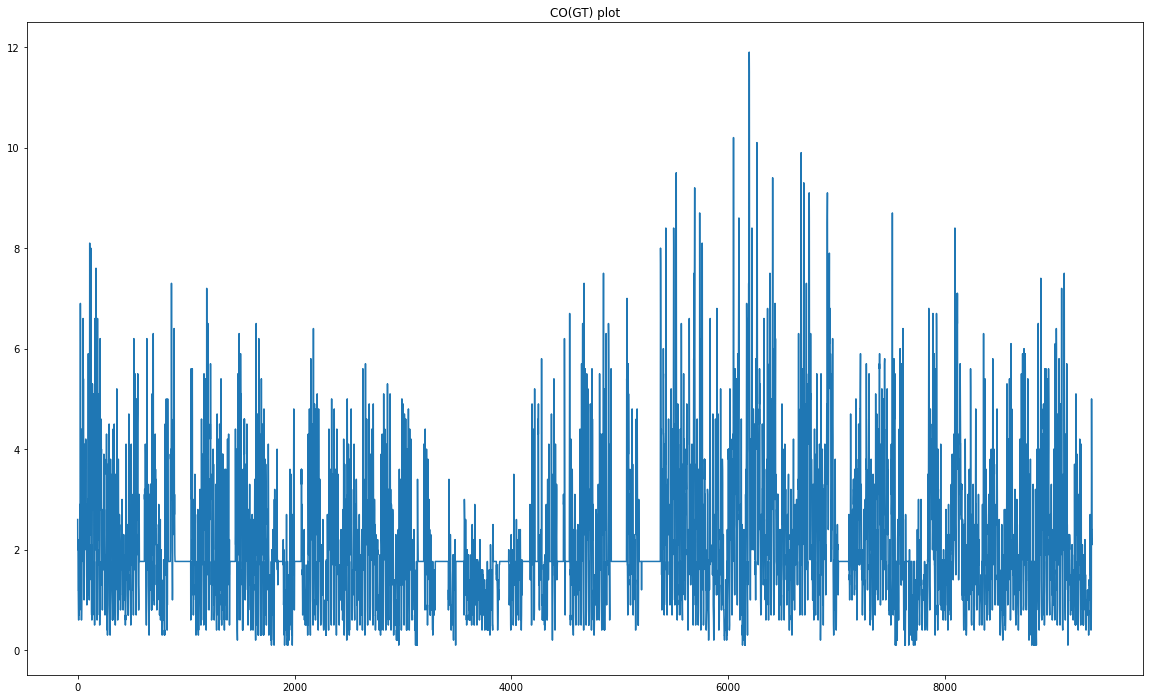

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot(data['CO(GT)'])
plt.title('CO(GT) plot')

Text(0.5, 1.0, 'Temperature plot')

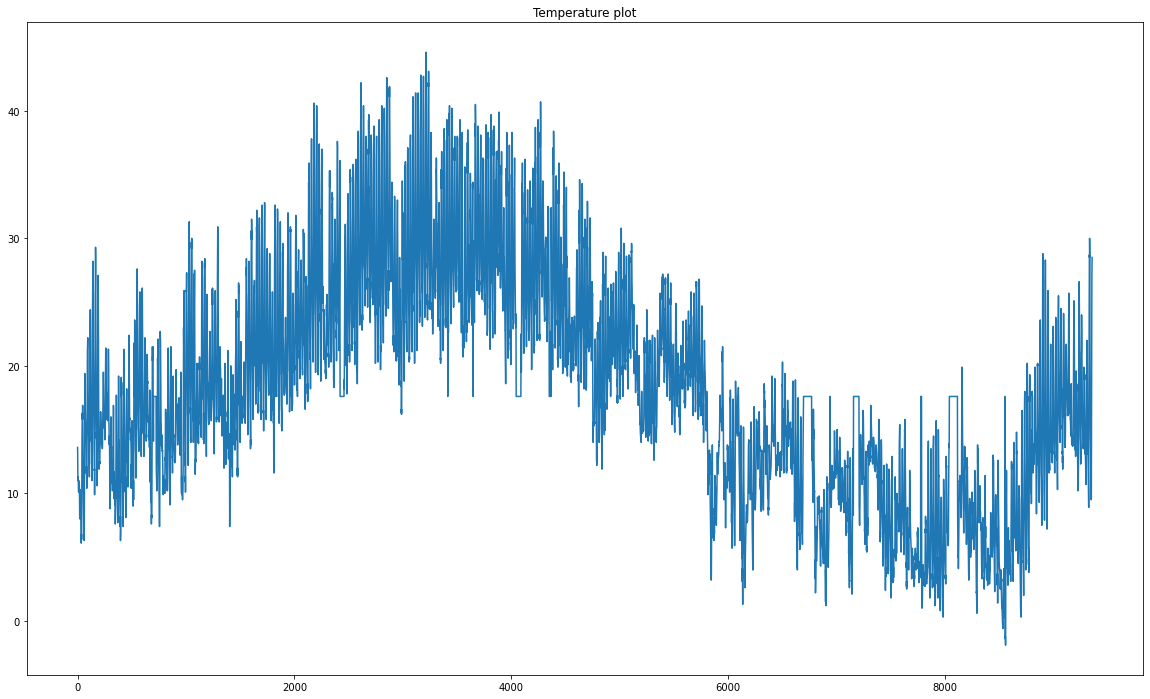

In [136]:
plt.figure(figsize=(20,12))
plt.plot(data['T'])
plt.title('Temperature plot')

In [141]:
data['datetime'] = data['Date'] + str(' ')+ data['Time']

In [142]:
data.head()

,Date,Time,CO(GT),T,day,hour,datetime
0,10/03/2004,18.00.00,2.6,13.6,10.0,18,10/03/2004 18.00.00
1,10/03/2004,19.00.00,2.0,13.3,10.0,19,10/03/2004 19.00.00
2,10/03/2004,20.00.00,2.2,11.9,10.0,20,10/03/2004 20.00.00
3,10/03/2004,21.00.00,2.2,11.0,10.0,21,10/03/2004 21.00.00
4,10/03/2004,22.00.00,1.6,11.2,10.0,22,10/03/2004 22.00.00


In [144]:
data['datetime'] = pd.to_datetime(data['datetime'].str.strip(), format='%d/%m/%Y %H.%M.%S')

In [145]:
for col in data.columns:  
    dataTypeSeries = data[col].dtypes
    print('Data type of '+ col+ ' column of Dataframe :')
    print(dataTypeSeries)

Data type of Date column of Dataframe :
object
Data type of Time column of Dataframe :
object
Data type of CO(GT) column of Dataframe :
float64
Data type of T column of Dataframe :
float64
Data type of day column of Dataframe :
float64
Data type of hour column of Dataframe :
object
Data type of datetime column of Dataframe :
datetime64[ns]


In [146]:
data.head()

,Date,Time,CO(GT),T,day,hour,datetime
0,10/03/2004,18.00.00,2.6,13.6,10.0,18,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,13.3,10.0,19,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,11.9,10.0,20,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,11.0,10.0,21,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,11.2,10.0,22,2004-03-10 22:00:00


In [147]:
cols = ['datetime','CO(GT)','T']
data = data[cols]

In [148]:
data.head()

,datetime,CO(GT),T
0,2004-03-10 18:00:00,2.6,13.6
1,2004-03-10 19:00:00,2.0,13.3
2,2004-03-10 20:00:00,2.2,11.9
3,2004-03-10 21:00:00,2.2,11.0
4,2004-03-10 22:00:00,1.6,11.2
